# Machine Learning 3
# Clustering

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('Live.csv')
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [25]:
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime


def getHour(x):
    dt = datetime.strptime(x, '%m/%d/%Y %H:%M')
    return int(dt.hour)

oe = OrdinalEncoder()
df[['status_type']] = oe.fit_transform(df[['status_type']])
df2 = df['status_published']
hour = list(range(0, len(df2)))
for i in range(0,len(df2)): 
    hour[i] = getHour(df2[i])
#print(hour)
df['hour'] = hour
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,246675545449582_1649696485147474,3.0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,6
1,246675545449582_1649426988507757,1.0,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,22
2,246675545449582_1648730588577397,3.0,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,6
3,246675545449582_1648576705259452,1.0,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2
4,246675545449582_1645700502213739,1.0,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,3


In [27]:
df = df.drop(columns=['status_published'])
df.head()


,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,246675545449582_1649696485147474,3.0,529,512,262,432,92,3,1,1,0,6
1,246675545449582_1649426988507757,1.0,150,0,0,150,0,0,0,0,0,22
2,246675545449582_1648730588577397,3.0,227,236,57,204,21,1,1,0,0,6
3,246675545449582_1648576705259452,1.0,111,0,0,111,0,0,0,0,0,2
4,246675545449582_1645700502213739,1.0,213,0,0,204,9,0,0,0,0,3


In [29]:
dfn =  df.drop(columns=['status_id'])
dfn.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,3.0,529,512,262,432,92,3,1,1,0,6
1,1.0,150,0,0,150,0,0,0,0,0,22
2,3.0,227,236,57,204,21,1,1,0,0,6
3,1.0,111,0,0,111,0,0,0,0,0,2
4,1.0,213,0,0,204,9,0,0,0,0,3


[0 0 0 ... 0 0 0]


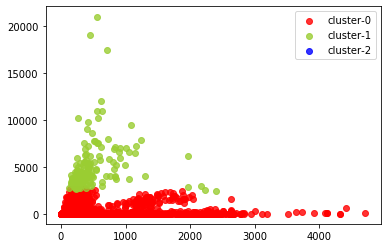

In [49]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

colors = ['red','yellowgreen','blue','gold','magenta']

model = KMeans(n_clusters=2, random_state=0)
model.fit(dfn.values)
ycl = model.predict(dfn.values)
print(ycl)
plt.figure()
for i in range(0,3):
    plt.scatter(dfn.values[ycl==i,1],dfn.values[ycl==i,2],label='cluster-'+str(i), alpha=0.8, color=colors[i])
plt.legend()
plt.show()

       status_type  num_reactions  num_comments   num_shares    num_likes  \
count  6909.000000    6909.000000   6909.000000  6909.000000  6909.000000   
mean      1.678825     224.142278    122.109857    30.806195   211.227529   
std       0.933541     461.856893    348.207305   100.156952   451.123208   
min       0.000000       0.000000      0.000000     0.000000     0.000000   
25%       1.000000      17.000000      0.000000     0.000000    17.000000   
50%       1.000000      56.000000      4.000000     0.000000    54.000000   
75%       3.000000     208.000000     19.000000     3.000000   174.000000   
max       3.000000    4710.000000   2641.000000  2139.000000  4710.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  \
count  6909.000000  6909.000000  6909.000000  6909.000000  6909.000000   
mean     10.908380     1.152989     0.556810     0.197424     0.096396   
std      36.007115     7.682270     3.765702     1.530557     0.700711   
min       

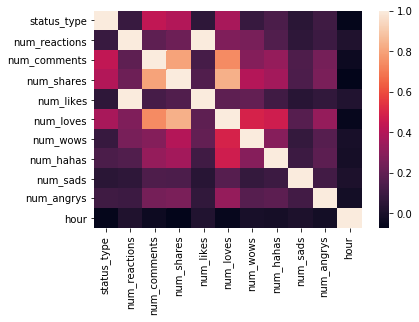

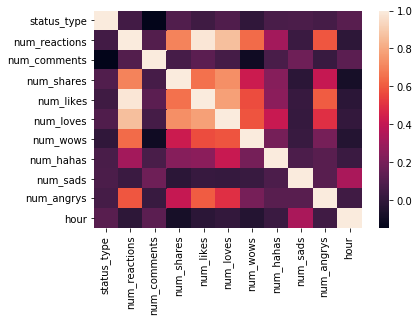

In [52]:
import seaborn as sns
from sklearn.metrics import silhouette_score

for i in range(0,2):
    dcluster = dfn[ycl==i]
    print(dcluster.describe())
    print('--------------------------------------------------------------------------------')
    plt.figure()
    cr = dcluster.corr()
    sns.heatmap(cr)
    plt.show
    
from sklearn.metrics import silhouette_score
print('Silhouette score = ',str(silhouette_score(dfn.values,ycl)))

[-1 -1 -1 ...  0 -1  0]


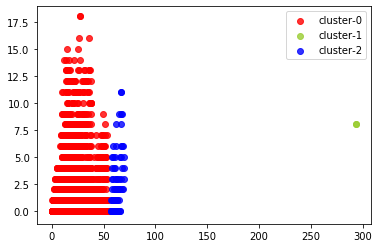

Silhouette score =  -0.5109640444269063


In [53]:
model = DBSCAN(eps=3, min_samples=2)
#model.fit(dfn.values)
ycl = model.fit_predict(dfn.values)
print(ycl)
plt.figure()
for i in range(0,3):
    plt.scatter(dfn.values[ycl==i,1],dfn.values[ycl==i,2],label='cluster-'+str(i), alpha=0.8, color=colors[i])
plt.legend()
plt.show()

print('Silhouette score = ',str(silhouette_score(dfn.values,ycl)))